In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [195]:
# data = pd.read_excel("data_test-1.xls", header=26, skiprows=0)
raw_data = pd.read_excel("python_data_2013.xls")
data = raw_data.copy()


In [196]:
data.shape

(3124, 252)

## Cleaning Data

In [197]:
data = data.dropna(axis=1, how='all').dropna(axis=0, how='all')

In [198]:
# removing any unnamed columns
for col in data.columns:
    if 'Unnamed' in col:
        del data[col]

In [199]:
data.shape

(3124, 235)

In [200]:
data = data[data['MAT $ 2011'] != 0]
data = data[data['MAT $ 2012'] != 0]
data = data[data['MAT $ 2013'] != 0]
data.shape

(1472, 235)

## Adding Features

In [162]:
# mean of occ cost % over 3 years
data['avg_occ_3yrs'] = data[['MAT Occ Cost % 2011', 'MAT Occ Cost % 2012', \
                                     'MAT Occ Cost % 2013']].apply(np.sum, axis=1)/3

In [163]:
imp_feat_list = ['Lease', 'MAT $ CAGR ', 'MAT $ (mo. slope) ', 'avg_occ_3yrs', 'MAT $ PSF Var_Avg ', 'MAT $ PSF Var_slope ', \
                'MAT Occ Cost % (slope) ', 'MAT Occ Cost % CAGR ', 'MAT Occ Cost % CAGR to MAT $ Var ', 'MAT Occ Cost %_Avg_Var _2013',\
                'MAT Occ Cost %_1yr_slope _', 'MAT Occ Cost %_2yr_slope _', 'Month $ PSF % Var_1yr_avg _', 'Month $ PSF % Var_2yr_avg _',\
                'Month $ PSF % Var (1 yr. slope) _', 'Month $ PSF % Var (2 yr. slope) _', 'Non-Holiday Month % Var _2013', \
                'Holiday Month % Var _2013', 'Lease Term (mo.)', 'AR_Past_Due_MAX', 'AR_% of Billings Owed_MAX', \
                'AR_61 - 90_MAX', 'AR_Over 90_MAX', 'AR_2monthover_MAX', 'Defaulted']

In [164]:
data.head()

,Lease,Space,Product Category,Space Type,Shop Count 2013,Area 2013,MAT $ 2011,MAT $ 2012,MAT $ 2013,MAT $ CAGR,...,AR_2monthover_6-14,AR_Past_Due_MAX,AR_1 - 30_MAX,AR_31 - 60_MAX,AR_61 - 90_MAX,AR_Over 90_MAX,AR_MTD Billings_MAX,AR_% of Billings Owed_MAX,AR_2monthover_MAX,avg_occ_3yrs
0,37247,0112234 1000,SF21 US Food Service,"In-Line Units 0-9,999 SF",1,664,83913.00,221541.00,211611.00,0.361141,...,0,18709.21,8473.31,0.00,9382.91,852.99,8473.31,2.208017,1,0.385854
1,27469,0112243 O358,SF11 US Food Court,"Food Court 0-9,999 SF",1,313,218807.00,207989.00,167542.22,-0.085141,...,0,24478.59,6809.72,0.00,9528.30,8140.57,6809.72,3.594654,1,0.374426
2,51346,0112253 FC6,SF11 US Food Court,"Food Court 0-9,999 SF",1,630,221596.00,231957.00,216441.00,-0.007815,...,0,17163.71,7464.11,0.00,7461.24,2238.36,7464.11,2.299499,1,0.375621
3,342043,0112327 218,S111 US Women's Fashion,"In-Line Units 0-9,999 SF",1,3770,593153.83,639872.06,598754.70,0.003138,...,0,21098.70,19213.71,0.00,0.00,1884.99,19213.71,1.098107,1,0.307303
4,20935,0112230 E2,S111 US Women's Fashion,"In-Line Units 0-9,999 SF",1,4673,833870.18,749929.89,731330.94,-0.042795,...,1,-18100.27,0.00,-42331.17,6451.03,17779.87,0.00,0.000000,1,0.193986


In [165]:
data.shape

(1472, 236)

In [166]:
# print(data['Lease Space Type-Calc'].unique())
# INL_data = data[data['Lease Space Type-Calc'] == 'INL']
# print(INL_data['Space Type'].unique())
# INL_data[INL_data['Space Type'] == 'In-Line Units 0-9,999 SF']

### Parsing Out Inline Tenants

In [167]:
INL_data = data[data['Lease Space Type-Calc'] == 'INL']
INL_data = INL_data[INL_data['Space Type'] == 'In-Line Units 0-9,999 SF']

# below code if i want to include multiple tenant types
# stk_list = ['INL']
# INL_data = [data['Lease Space Type-Calc'].isin(stk_list)]
INL_data.shape

(1081, 236)

### % of tenants that have defaulted within Inline dataset

In [168]:
INL_DEF_Tenants = INL_data[INL_data['Defaulted'] == 1]
print("Number of leases in dataset: ", len(INL_data))
print("Number of defaulted leases in dataset: ", len(INL_DEF_Tenants))
default_percent = "{:.2f}%".format(len(INL_DEF_Tenants)/len(INL_data))  # percent of defaulted tenants in inline dataset
print("Percent of defaulted: ", default_percent)

Number of leases in dataset:  1081
Number of defaulted leases in dataset:  79
Percent of defaulted:  0.07%


In [169]:
## sorts which malls have greatest number of defaults
pop_mall_defs = INL_data['BU Number-E1'].max()
print(pop_mall_defs)
INL_data[INL_data['BU Number-E1'] == pop_mall_defs]
print("Greatest number of defaults per mall is 2")


12327
Greatest number of defaults per mall is 2


## Logistic Regression Analysis

### SciKit Learn - Logistic Regression

In [170]:
# Import Logistic Regression & Linear regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score


In [171]:
## create data for logarithmic regression analysis
# log_list choooses categories I want to include in analysis
log_list = imp_feat_list
log_data = INL_data[log_list].copy()  # make sure to make copy so it's more than reference
log_data = log_data.drop('Lease', axis=1)  # drop lease from log_data
log_data = log_data.dropna(axis=0)  # remove any blank values from dataframe

In [172]:
# log_data.corr()  # looks at r^2 between features

In [173]:
log_data_X = log_data.drop('Defaulted', axis=1)  # remove defaulted column from dataframe
log_X = log_data_X.values  # turn datatable into array
log_y = log_data['Defaulted']  

In [174]:
# Fit logistic regression model
X_train_log, X_test_log, y_train_log, y_test_log = cross_validation.train_test_split(log_X, log_y, test_size=.5, random_state=0)

lr = LogisticRegression(C=1, max_iter=100, penalty='l2')  #l1: lasso l2: ridge regression
lr.fit(X_train_log, y_train_log)



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [175]:
lr.coef_
sorted(list(zip(lr.coef_[0], log_data_X.columns)))  # pull most weighted coefficients with respective feature name

[(-0.33459827254342317, 'avg_occ_3yrs'),
 (-0.26250195948924471, 'AR_2monthover_MAX'),
 (-0.088468864140263198, 'Month $ PSF % Var_2yr_avg _'),
 (-0.060425420495661721, 'MAT $ PSF Var_slope '),
 (-0.049776461104631575, 'MAT $ PSF Var_Avg '),
 (-0.043521987897161711, 'MAT Occ Cost % CAGR to MAT $ Var '),
 (-0.017491367529172734, 'Lease Term (mo.)'),
 (-0.0091305218546870182, 'MAT Occ Cost % (slope) '),
 (-1.3574767960566779e-05, 'AR_Past_Due_MAX'),
 (-6.7862882842572024e-06, 'MAT $ (mo. slope) '),
 (5.9007633597557998e-05, 'AR_Over 90_MAX'),
 (9.7638161829901411e-05, 'AR_61 - 90_MAX'),
 (0.00077799254003177779, 'MAT Occ Cost %_2yr_slope _'),
 (0.00097960466326316273, 'MAT Occ Cost %_1yr_slope _'),
 (0.0094668832268520447, 'MAT $ CAGR '),
 (0.032354366089692006, 'Month $ PSF % Var (2 yr. slope) _'),
 (0.035791560863943243, 'Month $ PSF % Var (1 yr. slope) _'),
 (0.052988871124013834, 'MAT Occ Cost % CAGR '),
 (0.065703668789450026, 'MAT Occ Cost %_Avg_Var _2013'),
 (0.1289621842964559, '

In [176]:
cross_val_score(lr, X_test_log, y_test_log)  # compares results of model to actual results

array([ 0.8839779 ,  0.92222222,  0.92178771])

In [177]:
log_prob = lr.predict_proba(log_X)[:, 1]  # returns the probability
# print(log_prob)
log_pred_y = lr.predict(log_X)
list(zip(log_y, log_pred_y, log_prob))

[(1, 0, 0.31654932580222955),
 (1, 0, 0.078082672507209711),
 (1, 0, 0.49423958892562198),
 (1, 0, 0.16836350991893384),
 (1, 0, 0.050396175017972639),
 (1, 0, 0.032477286786032733),
 (1, 0, 0.048309383413986585),
 (1, 0, 0.23196935832857141),
 (1, 0, 0.11718943585709456),
 (1, 0, 0.37244845354743139),
 (1, 0, 0.030225181729065846),
 (1, 0, 0.17018552582076288),
 (1, 0, 0.021020426272304635),
 (1, 0, 0.074154253246695834),
 (1, 0, 0.057107800389701001),
 (1, 0, 0.037549413590353319),
 (1, 0, 0.023654998308068463),
 (1, 0, 0.069894720488984471),
 (1, 0, 0.12781326401206441),
 (1, 0, 0.15119925497547482),
 (1, 0, 0.15091026415361727),
 (1, 0, 0.15753023679041922),
 (1, 0, 0.066419420520591035),
 (1, 0, 0.034004653677347028),
 (1, 0, 0.030078782447014441),
 (1, 0, 0.044510987771881817),
 (1, 0, 0.11641525082126886),
 (1, 0, 0.074966809036576904),
 (1, 0, 0.059349448695414253),
 (1, 0, 0.13878024279517678),
 (1, 0, 0.13902021352423238),
 (1, 0, 0.13030135955016739),
 (1, 0, 0.0775846548000

### GridSearch CV

CPU times: user 2.72 s, sys: 9.63 ms, total: 2.73 s
Wall time: 2.78 s
Best Ridge alpha: 806.532663317
Best Ridge score: 0.129386150281


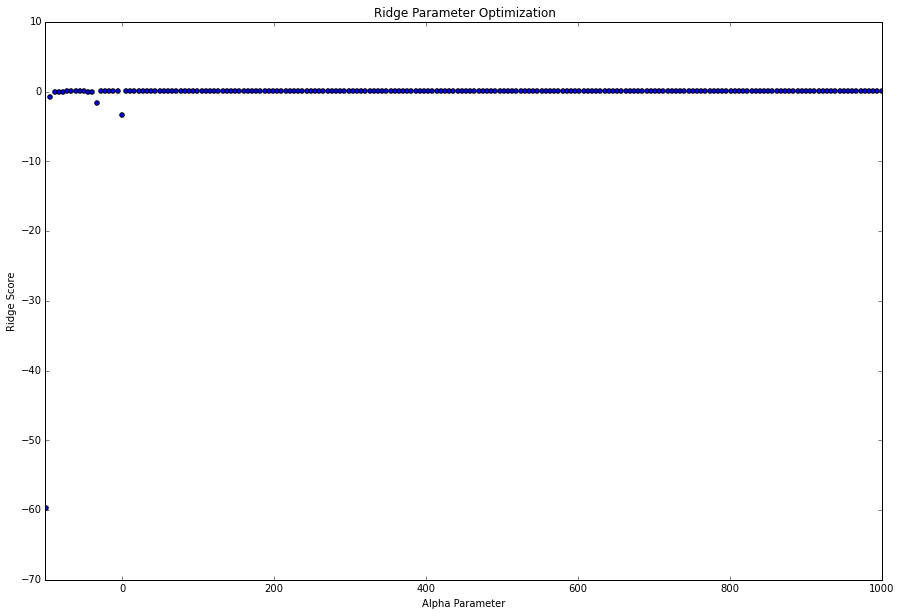

In [179]:
# Thanks Tim and Jane for this code :)

from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas), cv=5)
%time grid.fit(X_train_log, y_train_log)
print('Best Ridge alpha:', grid.best_estimator_.alpha)
print('Best Ridge score:', grid.best_score_)

from sklearn.linear_model import Ridge, Lasso
n_alphas = 200
alphas = np.linspace(-100, 1000, n_alphas)

score = []
for a in alphas:
   ridgelm = Ridge(alpha=a)
   ridgelm.fit(X_train_log, y_train_log)
   score.append(ridgelm.score(X_test_log, y_test_log))

plt.figure(figsize=(15, 10))
plt.xlabel('Alpha Parameter')
plt.ylabel('Ridge Score')
plt.title('Ridge Parameter Optimization')
plt.xlim(min(alphas)-1.1,max(alphas)+1.1)
plt.scatter(alphas,score);

### Stats Models - Logistic Regression Analysis

In [180]:
# Statsmodel APIs
import statsmodels.api as sm
import statsmodels.formula.api as smf  # uses R style formulas


In [181]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = cross_validation.train_test_split(log_X, log_y, test_size=.5, random_state=1)

X_train = sm.add_constant(X_train_sm)
model = sm.Logit(y_train_sm, X_train_sm)
results = model.fit()


Optimization terminated successfully.
         Current function value: 0.214396
         Iterations 13


In [182]:
cross_val_score(lr, X_test_sm, y_test_sm)

array([ 0.92777778,  0.90555556,  0.90555556])

In [183]:
results = smf.Logit(log_y, log_X, data=log_data).fit()

Optimization terminated successfully.
         Current function value: 0.224023
         Iterations 12


In [184]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              Defaulted   No. Observations:                 1080
Model:                          Logit   Df Residuals:                     1058
Method:                           MLE   Df Model:                           21
Date:                Mon, 09 Nov 2015   Pseudo R-squ.:                  0.1440
Time:                        16:35:23   Log-Likelihood:                -241.95
converged:                       True   LL-Null:                       -282.64
                                        LLR p-value:                 4.711e-09
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.6844   2.31e+07   1.59e-07      1.000     -4.53e+07  4.53e+07
x2          1.457e-06   3.16e-06      0.462      0.644     -4.73e-06  7.64e-06
x3            -5.4622      0.935     -5.845      0.0

In [185]:
sorted(list(zip(results.params, log_data_X.columns)))

[(-20.99874343816186, 'Month $ PSF % Var (2 yr. slope) _'),
 (-12.826683194380333, 'Month $ PSF % Var_2yr_avg _'),
 (-5.8160996304679236, 'MAT $ PSF Var_Avg '),
 (-5.4621685581314789, 'avg_occ_3yrs'),
 (-4.5282476874536801, 'MAT Occ Cost %_Avg_Var _2013'),
 (-3.8958722126436438, 'MAT $ PSF Var_slope '),
 (-1.5790000195128526, 'MAT Occ Cost % (slope) '),
 (-0.13013704713933688, 'Holiday Month % Var _2013'),
 (-0.021727378391393118, 'Lease Term (mo.)'),
 (1.4568361940777739e-06, 'MAT $ (mo. slope) '),
 (1.6193611766019542e-05, 'AR_Past_Due_MAX'),
 (2.2659220886932708e-05, 'AR_Over 90_MAX'),
 (4.2211537951801655e-05, 'AR_61 - 90_MAX'),
 (0.029889109639975799, 'AR_% of Billings Owed_MAX'),
 (0.20360834883118281, 'AR_2monthover_MAX'),
 (0.64987423555773149, 'Non-Holiday Month % Var _2013'),
 (0.91813166476273289, 'MAT Occ Cost % CAGR to MAT $ Var '),
 (2.7662647136655893, 'MAT Occ Cost % CAGR '),
 (3.6843904988963847, 'MAT $ CAGR '),
 (5.5714285704682496, 'Month $ PSF % Var (1 yr. slope) _'

# Random Forrest analysis

In [186]:
# import libraries

from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import DecisionTree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score
from matplotlib import pyplot as plt



# Set a random seed.
rng = np.random.RandomState(0)

## try out test, train split b/c high accuracy score

In [187]:
tree_list = imp_feat_list
tree_data = INL_data[tree_list].copy()  # make sure to make copy so it's more than reference
tree_data = tree_data.drop('Lease', axis=1)
tree_data = tree_data.dropna(axis=0)
tree_data_X = tree_data.drop('Defaulted', axis=1)


In [188]:
tree_X = tree_data_X.values
tree_y = tree_data['Defaulted']
# tree_data

In [189]:
# splitting data so as to avoid overfitting
X_train_tree, X_test_tree, y_train_tree, y_test_tree = cross_validation.train_test_split(tree_X, \
                                                                                         tree_y, \
                                                                                         test_size=.3, \
                                                                                         random_state=1)

In [190]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(tree_X, tree_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
# to research

cross_val_score(rf, tree_X, tree_y)

array([ 0.94736842,  0.94444444,  0.96657382])

In [192]:
tree_pred_y = rf.predict(tree_X)

In [35]:
list(zip(tree_y, tree_pred_y))

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

## Find important classifiers

In [36]:
# Thanks Tim for the references

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


# variables for graph input
rand_imp_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rand_imp_feats = []
rand_imp_featnums = []

for f in range(10):
    
    # appending feature names to rand_imp_feats list
    feats = tree_data_X.columns[indices[f]]
    rand_imp_feats.append(feats)
    # appending feature values to rand_imp_featnums list
    featnums = importances[indices[f]]
    rand_imp_featnums.append(featnums)

    print("%d. feature %s (%f)" % (f + 1, tree_data_X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature AR_Past_Due_MAX (0.078503)
2. feature AR_Over 90_MAX (0.063118)
3. feature AR_% of Billings Owed_MAX (0.061915)
4. feature Lease Term (mo.) (0.054157)
5. feature AR_61 - 90_MAX (0.052208)
6. feature MAT Occ Cost %_1yr_slope _ (0.048980)
7. feature MAT $ PSF Var_Avg  (0.048580)
8. feature MAT $ (mo. slope)  (0.046378)
9. feature Month $ PSF % Var (1 yr. slope) _ (0.045626)
10. feature Month $ PSF % Var_2yr_avg _ (0.044936)


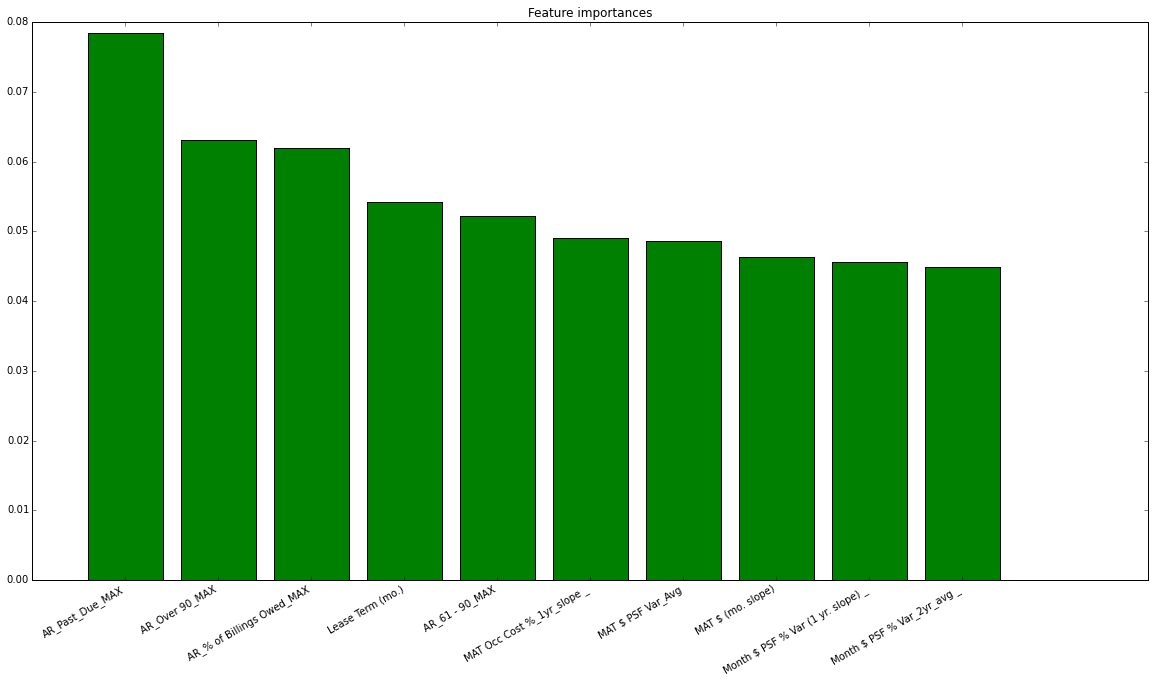

In [110]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(rand_imp_range, rand_imp_featnums,
       color="g", align="center")
plt.xticks(rand_imp_range, rand_imp_feats, rotation=30, ha='right')
plt.show()




## K-means Clustering

In [38]:
# import kmeans libraries
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

In [39]:
## create data for K-means clustering analysis
# k_list choooses categories I want to include in analysis
k_list = imp_feat_list
kmdata = INL_data[k_list].copy()  # make sure to make copy so it's more than reference
kmdata = kmdata.drop('Lease', axis=1)  # drop lease from log_data
kmdata = kmdata.dropna(axis=0)  # remove any blank values from dataframe

In [40]:
kmdata_X = kmdata.drop('Defaulted', axis=1)  # remove defaulted column from dataframe
kmdata_X = kmdata_X.values  # turn datatable into array
kmdata_y = kmdata['Defaulted']  

In [41]:
##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,100)

  # scipy.cluster.vq.kmeans
KM = [kmeans(kmdata_X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(kmdata_X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/kmdata_X.shape[0] for d in dist]

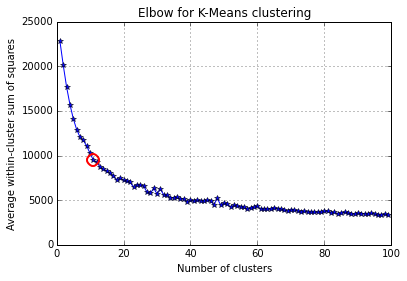

In [123]:
kIdx = 10
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  

In [124]:
from sklearn.cluster import KMeans
km = KMeans(10, init='k-means++') # initialize
km.fit(kmdata_X)
c = km.predict(kmdata_X) # classify into three clusters

## Add cluster feature to data table

In [125]:
kmdata['cluster_num'] = c

# table below shows that defaulted tenants do not all get grouped together.
kmdata

,MAT $ CAGR,MAT $ (mo. slope),avg_occ_3yrs,MAT $ PSF Var_Avg,MAT $ PSF Var_slope,MAT Occ Cost % (slope),MAT Occ Cost % CAGR,MAT Occ Cost % CAGR to MAT $ Var,MAT Occ Cost %_Avg_Var _2013,MAT Occ Cost %_1yr_slope _,...,Non-Holiday Month % Var _2013,Holiday Month % Var _2013,Lease Term (mo.),AR_Past_Due_MAX,AR_% of Billings Owed_MAX,AR_61 - 90_MAX,AR_Over 90_MAX,AR_2monthover_MAX,Defaulted,cluster_num
0,0.361141,5320.750000,0.385854,0.375510,0.211976,0.076509,0.572048,-0.210908,0.142591,-0.001817,...,-0.048645,-0.032776,12.033333,18709.21,2.208017,9382.91,852.99,1,1,0
3,0.003138,233.369583,0.307303,0.020201,-0.055179,0.063030,0.159839,-0.156701,0.094094,0.002508,...,-0.006054,-0.302160,41.533333,21098.70,1.098107,0.00,1884.99,1,1,0
4,-0.042795,-4272.468333,0.193986,-0.009102,-0.061479,-0.017836,-0.102595,0.059800,-0.034183,-0.004741,...,0.011227,-0.170124,10.100000,-18100.27,0.000000,6451.03,17779.87,1,1,0
15,-0.007132,-909.045833,0.314015,-0.091493,0.136485,-0.025841,-0.062882,0.055751,-0.070661,-0.005619,...,0.053296,-0.090383,3.733333,4935.36,0.328955,0.00,0.00,0,1,0
16,0.046818,4728.415833,0.352594,-0.069668,0.219157,-0.011355,0.024337,0.022481,-0.069336,-0.001520,...,0.117769,0.002041,69.833333,7449.47,0.286865,-1252.84,0.00,0,1,0
17,0.027297,4218.025000,0.212426,-0.038370,0.111655,-0.061689,-0.160095,0.187392,-0.390789,-0.004936,...,0.042827,-0.025595,24.700000,7645.24,0.167652,-3256.98,-17115.98,0,1,0
20,0.024471,2965.316667,0.300404,0.007333,0.010960,-0.005328,0.012690,0.011781,-0.061151,0.002252,...,-0.027699,-0.059058,63.600000,9164.52,0.341235,0.00,212.22,1,1,0
21,-0.022834,-3621.774167,0.275015,-0.075788,0.097619,-0.103406,-0.256893,0.234060,-0.478744,-0.008009,...,-0.019026,0.207337,6.133333,60961.49,1.642417,0.00,18065.90,1,1,4
22,-0.065178,-3943.577083,0.338985,-0.102406,0.014634,0.040100,0.011982,-0.077160,0.091002,0.002118,...,-0.056123,-0.184678,82.133333,45289.56,0.000000,719.00,30187.14,1,1,4
24,-0.023452,-2401.275417,0.113829,7.665126,-11.516648,0.010218,0.038614,-0.062066,-0.028466,0.000266,...,0.047199,-0.055320,14.933333,30678.33,3.196039,959.89,10453.33,1,1,4


In [131]:
# kmdata[kmdata['cluster_num'] == 0]

## Support Vector Machines

In [133]:
from sklearn import svm

In [134]:
## create data for SVM analysis
# svm_list choooses categories I want to include in analysis
svm_list = imp_feat_list
svmdata = INL_data[svm_list].copy()  # make sure to make copy so it's more than reference
svmdata = svmdata.drop('Lease', axis=1)  # drop lease from log_data
svmdata = svmdata.dropna(axis=0)  # remove any blank values from dataframe

In [135]:
outliers = svmdata[svmdata['Defaulted'] == 1]
inliers = svmdata[svmdata['Defaulted'] == 0]

In [136]:
# inlier data
inlier_svmdata_X = inliers.drop('Defaulted', axis=1)  # remove defaulted column from dataframe
inlier_svmdata_X = inlier_svmdata_X.values  # turn datatable into array
inlier_svmdata_y = inliers['Defaulted']  

In [137]:
# inlier data
outlier_svmdata_X = outliers.drop('Defaulted', axis=1)  # remove defaulted column from dataframe
outlier_svmdata_X = outlier_svmdata_X.values  # turn datatable into array
outlier_svmdata_y = outliers['Defaulted']  

In [138]:
clf = svm.OneClassSVM(nu=0.5, kernel="rbf")
clf.fit(inlier_svmdata_X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0, kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [139]:
# cross_val_score(clf, svmdata_X, kmdata_y)

In [140]:
svm_pred_y = clf.predict(inlier_svmdata_X)

In [141]:
clf.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 0.0,
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.5,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [142]:
list(zip(inlier_svmdata_y, svm_pred_y))

[(0, 1.0),
 (0, 1.0),
 (0, -1.0),
 (0, -1.0),
 (0, 1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1.0),
 (0, -1

## PCA - Dimension Reduction

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca_list = imp_feat_list
pca_data = INL_data[pca_list].copy()  # make sure to make copy so it's more than reference
pca_data = pca_data.drop('Lease', axis=1)
pca_data = pca_data.dropna(axis=0)
pca_data_X = pca_data.drop('Defaulted', axis=1)

pca_X = pca_data_X.values
pca_y = pca_data['Defaulted']


In [50]:
# create the model and fit the data
pca = PCA(n_components=2)
X_r = pca.fit(pca_X).transform(pca_X)

In [51]:
# first component explains how much data is available (not lost)
pca.explained_variance_ratio_  

array([ 0.84239831,  0.13553984])

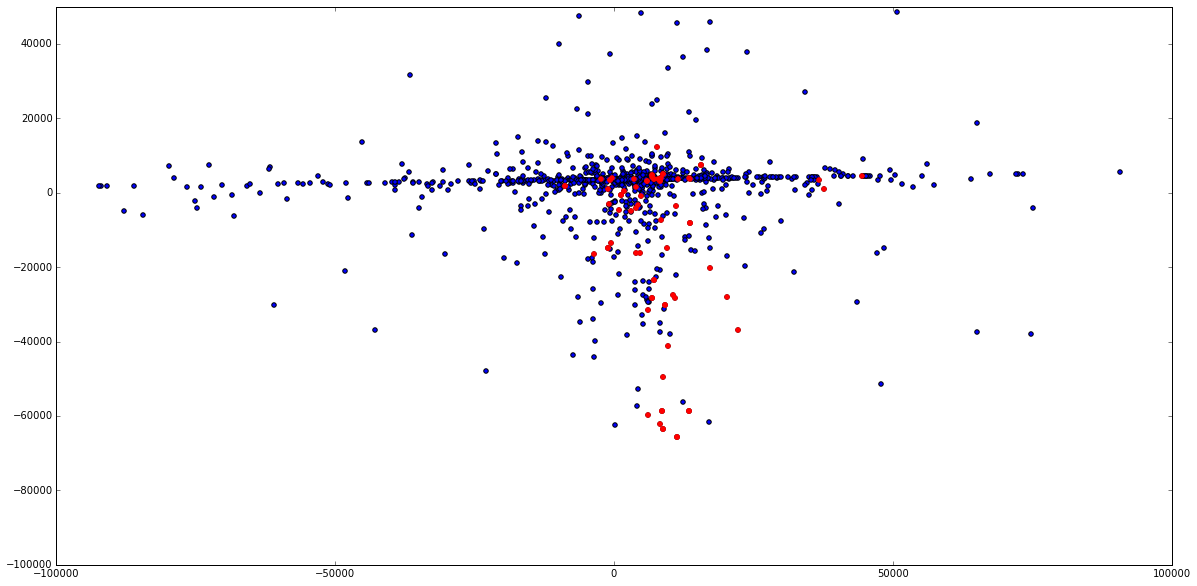

In [152]:
plt.figure(figsize=(20,10))
plt.xlim(-100000, 100000)
plt.ylim(-100000, 50000)
plt.scatter(X_r[:,0], X_r[:,1])


default_tens = []
for i, x in enumerate(pca_y):  #returns index in addition to the value of the index
    if x == 1:
#         print(X_r[i, 0], X_r[i, 1], pca_X[i])
        plt.scatter(X_r[i, 0], X_r[i, 1], color='r')
 

## LDA & QDA - Dimension Reduction

In [57]:
from sklearn.lda import LDA  # Linear Discriminant Analysis
from sklearn.qda import QDA  # Quadratic Discriminant Analysis

In [64]:
# create the model and fit the data
lda = LDA(n_components=3)
X_r2 = lda.fit(pca_X, pca_y).transform(pca_X)

//anaconda/lib/python3.4/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [65]:
print(X_r2)

[[ 1.8792045 ]
 [ 1.02647661]
 [ 1.21164678]
 ..., 
 [-0.34844715]
 [-0.23930798]
 [-0.51632652]]


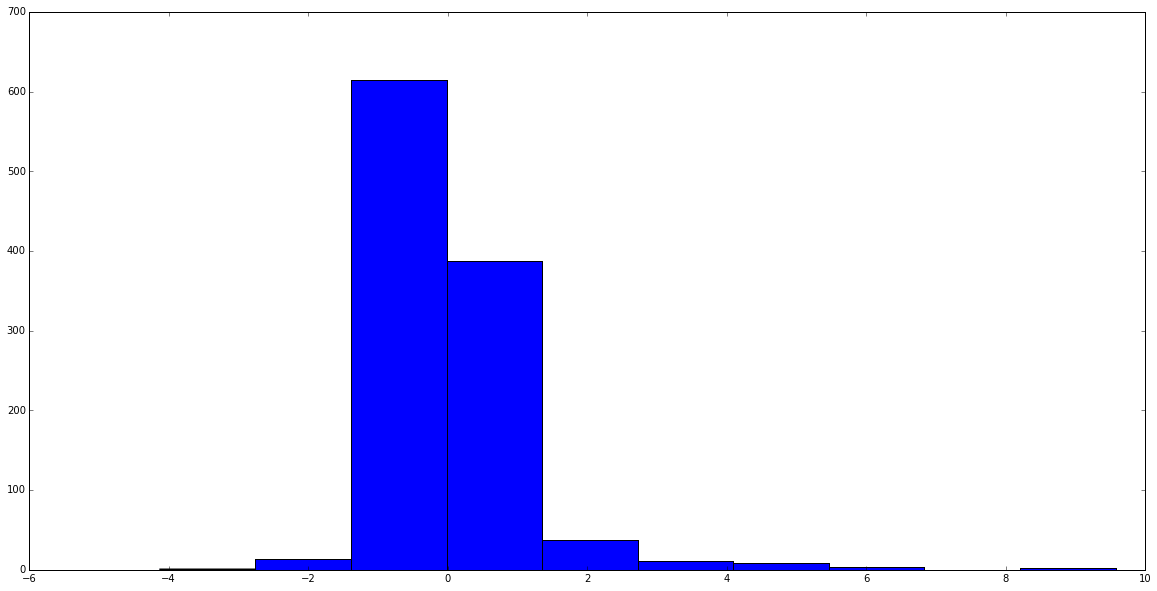

In [151]:
plt.figure(figsize=(20,10))
# plt.xlim(-100000, 100000)
# plt.ylim(-100000, 100000)
plt.hist(X_r2)
plt.show()


# for i, x in enumerate(pca_y):  #returns index in addition to the value of the index
#     if x == 1:
#         print(X_r2[i, 0], pca_X[i])
#         plt.hist(X_r2[i, 0], color='r')


In [61]:
# create the model and fit the data
qda = QDA()
X_r3 = qda.fit(pca_X, pca_y).predict(pca_X)

//anaconda/lib/python3.4/site-packages/sklearn/qda.py:133: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [149]:
# R^2 correlation between data features
# pca_data.corr()

,MAT $ CAGR,MAT $ (mo. slope),avg_occ_3yrs,MAT $ PSF Var_Avg,MAT $ PSF Var_slope,MAT Occ Cost % (slope),MAT Occ Cost % CAGR,MAT Occ Cost % CAGR to MAT $ Var,MAT Occ Cost %_Avg_Var _2013,MAT Occ Cost %_1yr_slope _,...,Month $ PSF % Var (2 yr. slope) _,Non-Holiday Month % Var _2013,Holiday Month % Var _2013,Lease Term (mo.),AR_Past_Due_MAX,AR_% of Billings Owed_MAX,AR_61 - 90_MAX,AR_Over 90_MAX,AR_2monthover_MAX,Defaulted
MAT $ CAGR,1.000000,0.457135,-0.126273,0.496677,0.144791,-0.321333,0.856690,0.119151,-0.267402,-0.242744,...,0.037312,0.664706,0.581911,0.140054,-0.034280,-0.023251,-0.020872,-0.033632,0.046153,-0.067612
MAT $ (mo. slope),0.457135,1.000000,-0.117932,0.207526,0.078985,-0.176179,0.350358,0.133896,-0.227194,-0.124625,...,0.017885,0.381348,0.423948,0.152845,-0.049747,-0.023935,-0.055446,-0.000954,0.045885,-0.058162
avg_occ_3yrs,-0.126273,-0.117932,1.000000,-0.010002,-0.062225,0.335121,-0.082641,-0.064197,0.098023,0.389159,...,-0.020331,-0.142386,-0.189931,-0.180477,0.070850,0.056123,0.031379,0.061201,0.024981,0.066114
MAT $ PSF Var_Avg,0.496677,0.207526,-0.010002,1.000000,-0.756793,-0.157138,0.401208,0.105934,-0.160341,-0.052665,...,-0.138536,0.244111,0.188013,-0.027556,0.039950,0.064740,-0.002562,0.011581,0.031313,0.008320
MAT $ PSF Var_slope,0.144791,0.078985,-0.062225,-0.756793,1.000000,-0.063688,0.124827,0.015739,-0.034563,-0.106370,...,0.177920,0.134894,0.148666,0.106398,-0.069184,-0.091901,-0.014187,-0.036428,-0.001862,-0.069350
MAT Occ Cost % (slope),-0.321333,-0.176179,0.335121,-0.157138,-0.063688,1.000000,0.071232,-0.705262,0.712298,0.701251,...,0.009528,-0.396726,-0.260915,-0.118255,0.064668,0.074992,0.066308,0.042575,-0.048981,0.078173
MAT Occ Cost % CAGR,0.856690,0.350358,-0.082641,0.401208,0.124827,0.071232,1.000000,-0.410081,0.146591,-0.046260,...,0.044488,0.488058,0.469188,0.108196,-0.003811,0.004058,0.006623,-0.015874,0.040874,-0.028753
MAT Occ Cost % CAGR to MAT $ Var,0.119151,0.133896,-0.064197,0.105934,0.015739,-0.705262,-0.410081,1.000000,-0.754956,-0.340157,...,-0.019658,0.235858,0.125788,0.039375,-0.053276,-0.048921,-0.049652,-0.028911,0.002929,-0.064202
MAT Occ Cost %_Avg_Var _2013,-0.267402,-0.227194,0.098023,-0.160341,-0.034563,0.712298,0.146591,-0.754956,1.000000,0.490512,...,-0.007386,-0.309423,-0.110200,-0.051629,0.092507,0.093684,0.071214,0.063167,-0.014604,0.092176
MAT Occ Cost %_1yr_slope _,-0.242744,-0.124625,0.389159,-0.052665,-0.106370,0.701251,-0.046260,-0.340157,0.490512,1.000000,...,-0.049520,-0.368962,-0.218041,-0.081144,0.065371,0.042863,0.059298,0.041272,-0.029227,0.076635
